In [2]:
import pandas as pd



df=pd.read_csv('../data/Bank_churn.csv')

# Display the first few rows of each dataset to understand their structure
df.head()


,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_data(df, target='churn'):
    """
    Generic data preprocessing function that:
    - Handles missing values
    - Encodes categorical variables
    - Scales numerical features
    """
    # Handle missing values (fill with mean for numerical and mode for categorical)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])  # Fill categorical columns with mode
        else:
            df[col] = df[col].fillna(df[col].mean())      # Fill numerical columns with mean
    
    # Encode categorical variables
    label_encoders = {}
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le
    
    # Split features and target
    X = df.drop(columns=[target])
    y = df[target]
    
    # Scale numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y, label_encoders, scaler

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def perform_eda(df, target='churn'):
    """
    Performing quick exploratory data analysis:
    - Visualize missing values
    - Display feature correlations with the target
    - Visualize distributions of key features
    """
    
    # Display correlation matrix
    corr_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Correlation with {target}")
    plt.show()

    # Visualize target distribution
    sns.countplot(x=target, data=df)
    plt.title(f"Distribution of {target}")
    plt.show()

In [6]:
X_telecom, y_telecom, encoders_telecom, scaler_telecom=preprocess_data(df)

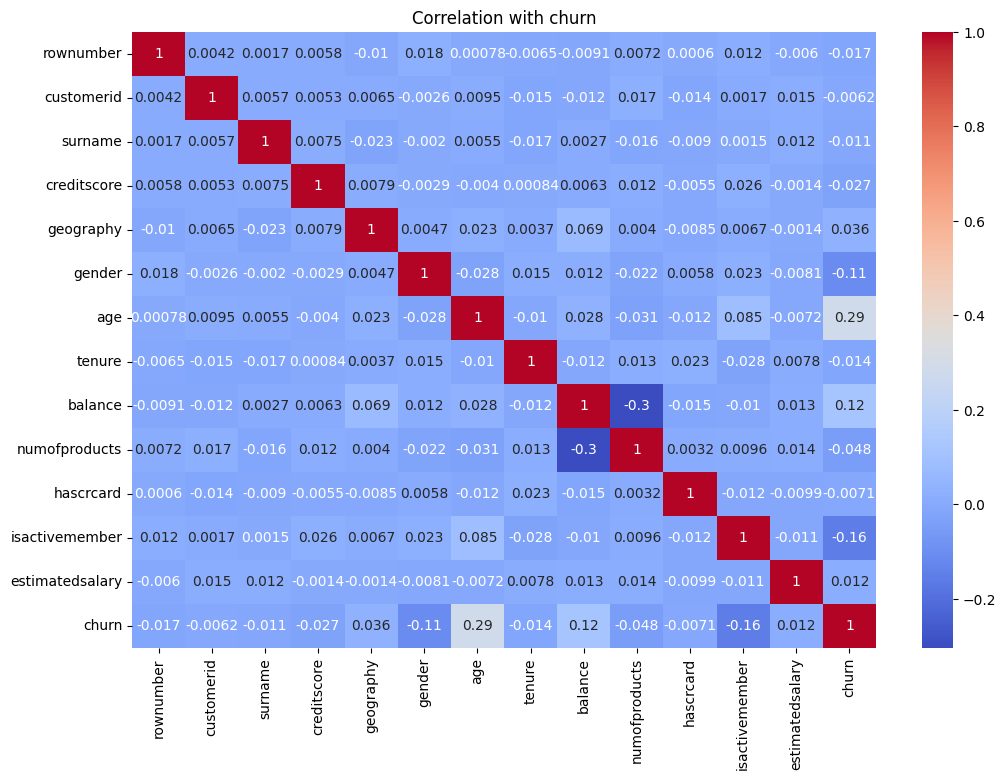

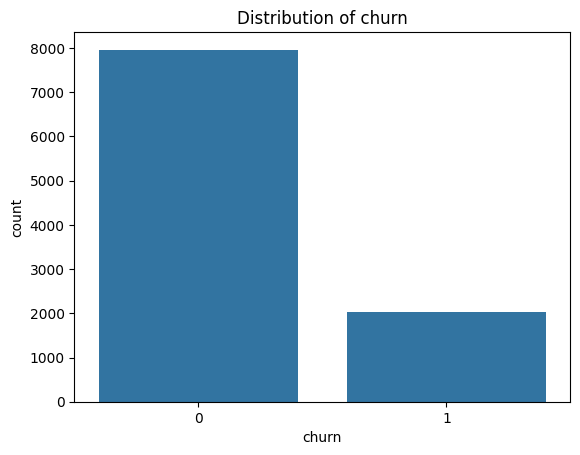

In [8]:
perform_eda(df, target='churn')

In [30]:
import numpy as np
import pandas as pd

# Define a simple feature engineering function
def feature_engineering(df):
    """
    Apply simple feature transformations:
    - Create interaction features
    - Bin continuous variables (e.g., age, balance)
    - Apply log transformation to skewed numerical features
    - Normalize/scale numerical features
    """
    
    # Example of creating interaction features
    if 'total day minutes' in df.columns and 'total eve minutes' in df.columns:
        df['total minutes'] = df['total day minutes'] + df['total eve minutes']
    
    # Binning continuous features (age, balance)
    if 'age' in df.columns:
        df['age_bin'] = pd.cut(df['age'], bins=[0, 18, 35, 60, np.inf], labels=['teen', 'young_adult', 'adult', 'senior'])
    
    if 'balance' in df.columns:
        df['balance_bin'] = pd.cut(df['balance'], bins=[-1, 10000, 50000, 100000, np.inf], labels=['low', 'medium', 'high', 'very_high'])
    
    # Apply log transformation to skewed numerical features
    if 'total intl charge' in df.columns:
        df['log_total_intl_charge'] = np.log1p(df['total intl charge'])  # log1p to avoid log(0) issues
    
    # Normalizing/Scaling features (min-max scaling as an example)
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_columns] = (df[numerical_columns] - df[numerical_columns].min()) / (df[numerical_columns].max() - df[numerical_columns].min())
    
    return df

# Apply feature engineering to the dataset
bank_df_transformed = feature_engineering(df)  # Assuming bank_df is your original DataFrame

# One-hot encoding categorical columns (age_bin, balance_bin)
def one_hot_encode_columns(df):
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    # Apply one-hot encoding
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    return df

# Re-apply one-hot encoding on the transformed dataset
bank_df_encoded = one_hot_encode_columns(bank_df_transformed)

# Check the transformed and encoded DataFrame
bank_df_encoded.head()


,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn,age_bin,balance_bin
0,0.0000,0.275616,0.380416,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,teen,low
1,0.0001,0.326454,0.401569,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,teen,low
2,0.0002,0.214421,0.696008,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,teen,low
3,0.0003,0.542636,0.098601,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,teen,low
4,0.0004,0.688778,0.621631,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,teen,low


In [33]:
def one_hot_encode_columns(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    return df

In [34]:
from sklearn.preprocessing import OrdinalEncoder

def ordinal_encode_columns(df, columns):
    encoder = OrdinalEncoder()
    df[columns] = encoder.fit_transform(df[columns])
    return df

# Use this after feature engineering
bank_df_encoded = ordinal_encode_columns(bank_df_transformed, ['age_bin', 'balance_bin'])


In [35]:
print(bank_df_encoded.dtypes)


rownumber          float64
customerid         float64
surname            float64
creditscore        float64
geography          float64
gender             float64
age                float64
tenure             float64
balance            float64
numofproducts      float64
hascrcard          float64
isactivemember     float64
estimatedsalary    float64
churn              float64
age_bin            float64
balance_bin        float64
dtype: object


In [36]:
bank_df_transformed=feature_engineering(df)
bank_df_transformed.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn,age_bin,balance_bin
0,0.0000,0.275616,0.380416,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,teen,low
1,0.0001,0.326454,0.401569,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,teen,low
2,0.0002,0.214421,0.696008,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,teen,low
3,0.0003,0.542636,0.098601,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,teen,low
4,0.0004,0.688778,0.621631,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,teen,low


In [14]:
# Function to apply one-hot encoding for categorical variables
def one_hot_encode_columns(df):
    # Identify categorical columns (object type) including engineered columns like age_bin and balance_bin
    categorical_columns = df.select_dtypes(include=['object']).columns
    # Apply one-hot encoding
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    return df

In [19]:
bank_df_encoded=one_hot_encode_columns(bank_df_transformed)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # For AUC-ROC

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "roc_auc": roc_auc
    }

# Callable function to evaluate multiple models
def evaluate_models(X_train, X_test, y_train, y_test):
    # Initialize models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }

    # Train and evaluate each model
    results = {}
    for model_name, model in models.items():
        print(f"\n{model_name} Performance:")
        results[model_name] = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)
    
    return results

# Extract features (X) and target (y) from the encoded DataFrame
X_bank = bank_df_encoded.drop(columns=['churn'])
y_bank = bank_df_encoded['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bank, y_bank, test_size=0.2, random_state=42)

# Call the function to evaluate models
model_results = evaluate_models(X_train, X_test, y_train, y_test)



Logistic Regression Performance:


ValueError: could not convert string to float: 'teen'

In [37]:
# Extract features (X) and target (y) from the dataset (bank_df_encoded)
X_bank = bank_df_encoded.drop(columns=['churn'])
y_bank = bank_df_encoded['churn']

In [38]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bank, y_bank, test_size=0.2, random_state=42)

In [39]:

# Call the function to evaluate models
model_results = evaluate_models(X_train, X_test, y_train, y_test)


Logistic Regression Performance:


ValueError: could not convert string to float: 'teen'